In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import folium
import seaborn as sns

In [2]:
%matplotlib inline

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [3]:
pd.options.display.max_columns = 30

In [4]:
data = pd.read_csv('식당 총집합.csv')

In [5]:
data.columns

Index(['Unnamed: 0', '기준년월', '식당ID', '식당명', '지점명', '대표전화번호', '식당지번주소',
       '식당도로명주소', '식당위도좌표값', '식당경도좌표값', '1인당가격만원단위구간값', '음식대분류명', '음식소분류명',
       '주차구분명', '식당영업시간값  ', '휴식시간내용', '최종주문가능시간값', '식당휴일내용', '메인메뉴내용',
       '식당평점값', '식당리뷰수', '식당조회수', '식당방문희망건수', 'Unnamed: 22', '식당영업시간값', '대상년월',
       'Unnamed: 21', '탑리스트ID', '탑리스트타이틀', '탑리스트설명', '탑리스트내순위', 'Unnamed: 25'],
      dtype='object')

In [6]:
data.drop(['주차구분명', '식당영업시간값  ', '휴식시간내용','식당휴일내용', 'Unnamed: 22','Unnamed: 21', '탑리스트ID', '탑리스트타이틀', '탑리스트설명', '탑리스트내순위', 'Unnamed: 25'], axis = 1, inplace = True)

In [7]:
data.drop(['Unnamed: 0', '최종주문가능시간값'], axis= 1, inplace = True)

In [8]:
data.head(5)

기준년월        식당ID    식당명  지점명         대표전화번호               식당지번주소  \
0  202004.0  930AnUvy01  좋은흑염소  NaN   033-255-5579     강원도 춘천시 퇴계동 1144   
1  202004.0  99GVb8kY5k   낭만국시  NaN   033-252-6255   강원도 춘천시 죽림동 11-121   
2  202004.0  oJjxye3Gt6  리버스토리  NaN  070-4252-4540  강원도 춘천시 서면 신매리 67-1   
3  202004.0  k8Rnj-EDVL    산마루  NaN   033-241-7783     강원도 춘천시 요선동 4-18   
4  202004.0  MCnsgZiqXN   로케로케  NaN  010-8243-0282  강원도 춘천시 소양로4가 109-4   

               식당도로명주소    식당위도좌표값     식당경도좌표값 1인당가격만원단위구간값 음식대분류명     음식소분류명  \
0       강원도 춘천시 남춘천길 5  37.865906  127.727455          NaN     한식      고기 요리   
1    강원도 춘천시 명동길29번길 3  37.878124  127.725922          NaN     한식  국수 / 면 요리   
2  강원도 춘천시 서면 박사로 1210  37.916904  127.712669          NaN     카페   카페 / 디저트   
3  강원도 춘천시 서부대성로47번길 4  37.883385  127.728447          NaN     한식      기타 한식   
4      강원도 춘천시 중앙로 128  37.876268  127.720938          NaN     카페       베이커리   

  메인메뉴내용  식당평점값  식당리뷰수  식당조회수 식당방문희망건수 식당영업시간값 대상년월  
0    NaN    NaN    0.0  794.0      0.0     NaN  NaN  
1    NaN    NaN    0.0  810.0      2.0     NaN  NaN  
2    NaN    NaN    0.0  532.0      0.0     NaN  NaN  
3    NaN    NaN    0.0  470.0      0.0     NaN  NaN  
4    NaN    NaN    0.0  535.0      3.0     NaN  NaN

In [9]:
def gu(x):
    return x.split()[1]
data['구'] = data['식당지번주소'].apply(gu)

In [10]:
data = data[data['구'] == '종로구']

In [11]:
loc = data[['식당명','식당위도좌표값', '식당경도좌표값']]

In [12]:
loc.index = range(len(loc))

In [13]:
data.index = range(len(data))

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   기준년월          3477 non-null   float64
 1   식당ID          3624 non-null   object 
 2   식당명           3624 non-null   object 
 3   지점명           949 non-null    object 
 4   대표전화번호        3465 non-null   object 
 5   식당지번주소        3624 non-null   object 
 6   식당도로명주소       3624 non-null   object 
 7   식당위도좌표값       3624 non-null   float64
 8   식당경도좌표값       3624 non-null   float64
 9   1인당가격만원단위구간값  3582 non-null   object 
 10  음식대분류명        3624 non-null   object 
 11  음식소분류명        3624 non-null   object 
 12  메인메뉴내용        146 non-null    object 
 13  식당평점값         535 non-null    float64
 14  식당리뷰수         3624 non-null   float64
 15  식당조회수         3624 non-null   object 
 16  식당방문희망건수      3624 non-null   object 
 17  식당영업시간값       144 non-null    object 
 18  대상년월          45 non-null   

In [15]:
data.head(5)

기준년월        식당ID   식당명   지점명        대표전화번호              식당지번주소  \
0  202004.0  5AkF4cpuuS  송림식당   NaN  02-3672-6529    서울시 종로구 창신동 73-2   
1  202004.0  0N2lu7G1FQ  썬더치킨  동대문점   02-765-6044   서울시 종로구 창신동 17-12   
2  202004.0  AYoKM3JoUY   비틀즈   NaN  02-2232-9980   서울시 종로구 숭인동 212-5   
3  202004.0  Xog8hujYhX   잇커피  동대문점  02-2262-0176  서울시 종로구 종로6가 289-3   
4  202004.0  QEHCBzfwPO  대동식당   NaN  02-2279-5810     서울시 종로구 예지동 6-1   

              식당도로명주소    식당위도좌표값     식당경도좌표값 1인당가격만원단위구간값 음식대분류명       음식소분류명  \
0  서울특별시 종로구 지봉로7길 12  37.575005  127.015282          NaN     한식        기타 한식   
1    서울특별시 종로구 지봉로 91  37.578251  127.015152          NaN     주점  치킨 / 호프 / 펍   
2  서울특별시 종로구 종로 376-2  37.573776  127.019279          NaN     카페     카페 / 디저트   
3  서울특별시 종로구 청계천로 279  37.570061  127.008745          NaN     카페     카페 / 디저트   
4   서울특별시 종로구 창경궁로 88  37.570057  126.998947          NaN     한식        기타 한식   

  메인메뉴내용  식당평점값  식당리뷰수   식당조회수 식당방문희망건수 식당영업시간값 대상년월    구  
0    NaN    NaN    0.0   813.0      2.0     NaN  NaN  종로구  
1    NaN    NaN    0.0   779.0      0.0     NaN  NaN  종로구  
2    NaN    NaN    0.0   399.0      2.0     NaN  NaN  종로구  
3    NaN    NaN    0.0  1445.0      0.0     NaN  NaN  종로구  
4    NaN    NaN    0.0  1671.0      7.0     NaN  NaN  종로구

In [16]:
def tofloat(x):
    x = float(x.replace(',', ''))
    return x
data['식당조회수'] = data['식당조회수'].apply(tofloat)
data['식당방문희망건수'] = data['식당방문희망건수'].apply(tofloat)


C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\msi\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


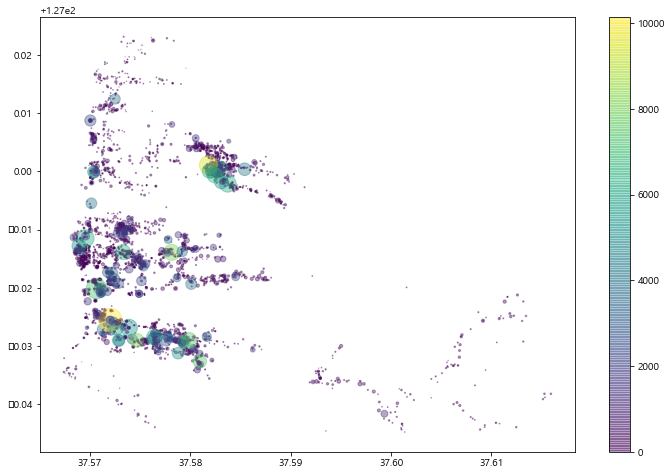

In [17]:
plt.figure(figsize = (12,8))
plt.scatter(x = data['식당위도좌표값'], y = data['식당경도좌표값'], alpha = 0.4,
            s = data['식당조회수'] / 1000, label = '식당조회수',
            c = data['식당방문희망건수']
           )
plt.colorbar()
plt.show()

In [627]:
a

행정동    전체 조회수 평균  이상치 제외한 조회수 평균    이상치 조회수 평균  \
0           가회동  7469.521212     1905.514286  38627.960000   
1           교남동  1433.107143     1108.346154   5655.000000   
2           무악동  1823.909091     1103.333333   5066.500000   
3           부암동  3701.891892     1975.076923  16173.333333   
4           사직동  9010.323689     1873.910230  55204.135135   
5           삼청동  5589.372781     3225.292208  29860.600000   
6          숭인1동  1296.466667      886.538462   3961.000000   
7          숭인2동  1379.272727      913.692308   5010.800000   
8           이화동  3675.945205     1850.567708  16656.407407   
9   종로1·2·3·4가동  5677.077036     1906.288079  35064.903226   
10      종로5·6가동  3321.687151     1373.740506  17977.666667   
11         창신1동  3919.217391     1043.438596  17579.166667   
12         창신2동  2710.266667     1310.800000   9707.600000   
13         창신3동  1228.200000      792.250000   2972.000000   
14        청운효자동  9228.054299     1900.843243  46881.777778   
15          평창동  2395.492308     1936.416667   7904.400000   
16          혜화동  7999.193237     1896.732782  51434.352941   

    전체 가게 대비 이상치 가게 비율  개업수  총 가게 수        개업률  
0            15.151515   10     165   6.060606  
1             7.142857   13      28  46.428571  
2            18.181818    1      11   9.090909  
3            12.162162    6      74   8.108108  
4            13.381555   60     553  10.849910  
5             8.875740   19     169  11.242604  
6            13.333333    2      15  13.333333  
7            11.363636    7      44  15.909091  
8            12.328767   15     219   6.849315  
9            11.371974  140    1363  10.271460  
10           11.731844   24     179  13.407821  
11           17.391304   10      69  14.492754  
12           16.666667   10      30  33.333333  
13           20.000000    2       5  40.000000  
14           16.289593   16     221   7.239819  
15            7.692308    9      65  13.846154  
16           12.318841   28     414   6.763285

In [18]:
import requests

json_data = requests.get('https://raw.githubusercontent.com/vuski/admdongkor/master/ver20121210/HangJeongDong_ver20121210.geojson').json()

In [19]:
json_data.keys()

dict_keys(['type', 'crs', 'features'])

In [20]:
json_data2 = json_data.copy()

In [21]:
json_data2['features'] = list()

In [22]:
json_data2

{'type': 'FeatureCollection',
 'crs': {'type': 'name',
  'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'}},
 'features': []}

In [23]:

for data in json_data['features']:
    if data['properties']['adm_nm'].split()[-2] == '종로구':
        print(data['properties']['adm_nm'].split()[-1])
        

사직동
삼청동
부암동
평창동
무악동
교남동
가회동
종로1·2·3·4가동
종로5·6가동
이화동
창신1동
창신2동
창신3동
숭인1동
숭인2동
청운효자동
혜화동


In [24]:
for data in json_data['features']:
    if data['properties']['adm_nm'].split()[-2] == '종로구':
        json_data2['features'].append(data)
        

In [175]:
for data in json_data2['features']:
    print(data['properties']['dong_name'])

사직동
삼청동
부암동
평창동
무악동
교남동
가회동
종로1·2·3·4가동
종로5·6가동
이화동
창신1동
창신2동
창신3동
숭인1동
숭인2동
청운효자동
혜화동


In [172]:
for data in json_data2['features']:
    data['properties']['dong_name'] = data['properties']['adm_nm'].split()[2]

In [188]:
visit = jongro.groupby('행정동',as_index = False)['식당조회수'].mean()
visit

행정동        식당조회수
0           가회동  7469.521212
1           교남동  1433.107143
2           무악동  1823.909091
3           부암동  3701.891892
4           사직동  9010.323689
5           삼청동  5589.372781
6         숭인제1동  1296.466667
7         숭인제2동  1379.272727
8           이화동  3675.945205
9   종로1.2.3.4가동  5677.077036
10      종로5.6가동  3321.687151
11        창신제1동  3919.217391
12        창신제2동  2710.266667
13        창신제3동  1228.200000
14        청운효자동  9228.054299
15          평창동  2395.492308
16          혜화동  7999.193237

In [190]:
visit.loc[[6,7,9,10,11,12,13],'행정동'] = ['숭인1동', '숭인2동', '종로1·2·3·4가동', '종로5·6가동', '창신1동', '창신2동', '창신3동']

In [201]:
visit.sort_values(by = '식당조회수', ascending = False)

행정동        식당조회수
14        청운효자동  9228.054299
4           사직동  9010.323689
16          혜화동  7999.193237
0           가회동  7469.521212
9   종로1·2·3·4가동  5677.077036
5           삼청동  5589.372781
11         창신1동  3919.217391
3           부암동  3701.891892
8           이화동  3675.945205
10      종로5·6가동  3321.687151
12         창신2동  2710.266667
15          평창동  2395.492308
2           무악동  1823.909091
1           교남동  1433.107143
7          숭인2동  1379.272727
6          숭인1동  1296.466667
13         창신3동  1228.200000

In [230]:
jongro_count_res = jongro.groupby('행정동',as_index = False).agg({'식당ID' : 'count'})
jongro_count_res

행정동  식당ID
0           가회동   165
1           교남동    28
2           무악동    11
3           부암동    74
4           사직동   553
5           삼청동   169
6         숭인제1동    15
7         숭인제2동    44
8           이화동   219
9   종로1.2.3.4가동  1363
10      종로5.6가동   179
11        창신제1동    69
12        창신제2동    30
13        창신제3동     5
14        청운효자동   221
15          평창동    65
16          혜화동   414

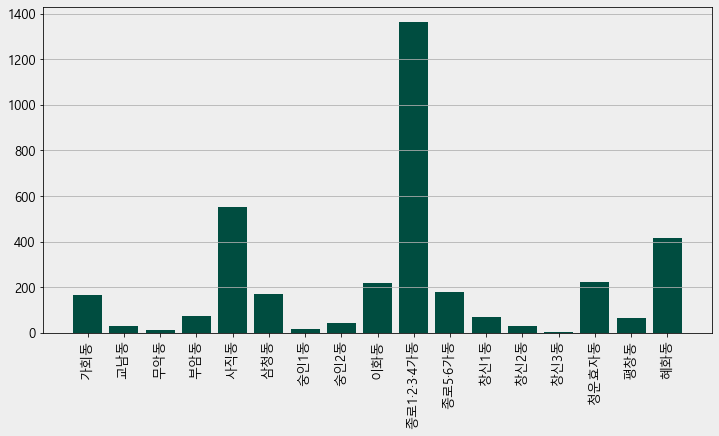

In [277]:
fig, ax = plt.subplots(figsize= (12,6), facecolor = '#eeeeee')

ax.set_facecolor('#eeeeee')
ax.bar(data = jongro_count_res, x = '행정동', height = '식당ID', color = '#004d40')
ax.set_xticks(range(len(visit)))
ax.set_xticklabels(visit['행정동'],rotation = 90, fontsize = 13)
ax.set_yticks([0,200,400,600,800,1000,1200,1400])
ax.set_yticklabels([0,200,400,600,800,1000,1200,1400], fontsize = 13)
ax.grid(axis = 'y')

# plt.savefig('동별 가게 수.png', dpi = 300)
plt.show()

In [202]:
jongro_outlier = jongro[jongro['식당조회수'] > outlier_st]

In [203]:
jongro_st = jongro.drop(jongro_outlier.index)

In [204]:
visit_outlier = jongro_outlier.groupby('행정동',as_index = False)['식당조회수'].mean() # 아웃라이어 값들
visit_outlier

행정동         식당조회수
0           가회동  35330.785714
1           부암동  13953.000000
2           사직동  52169.189873
3           삼청동  17910.500000
4         숭인제2동  11442.000000
5           이화동  16656.407407
6   종로1.2.3.4가동  35246.857143
7       종로5.6가동  27014.583333
8         창신제1동  23331.500000
9         창신제2동  11759.000000
10        청운효자동  44839.973684
11          평창동  10714.500000
12          혜화동  53249.244898

In [208]:
visit_st = jongro_st.groupby('행정동',as_index = False)['식당조회수'].mean() # 아웃라이어 제외 평균
visit_st

행정동        식당조회수
0           가회동  1775.248175
1           교남동  1433.107143
2           무악동  1823.909091
3           부암동  1717.806452
4           사직동  1817.179325
5           삼청동  2254.330827
6         숭인제1동  1296.466667
7         숭인제2동  1145.255814
8           이화동  1850.567708
9   종로1.2.3.4가동  1910.537634
10      종로5.6가동  1619.203593
11        창신제1동  1373.344262
12        창신제2동  1704.851852
13        창신제3동  1228.200000
14        청운효자동  1833.229508
15          평창동  2131.396825
16          혜화동  1924.528767

In [206]:
visit['식당조회수(이상치)'] = visit_outlier['식당조회수']
visit['식당조회수(이상치 제외)'] = visit_st['식당조회수']

In [211]:
visit_outlier = jongro_outlier.groupby('행정동',as_index = False)['식당조회수'].mean() # 아웃라이어 값들
visit_outlier

행정동         식당조회수
0           가회동  35330.785714
1           부암동  13953.000000
2           사직동  52169.189873
3           삼청동  17910.500000
4         숭인제2동  11442.000000
5           이화동  16656.407407
6   종로1.2.3.4가동  35246.857143
7       종로5.6가동  27014.583333
8         창신제1동  23331.500000
9         창신제2동  11759.000000
10        청운효자동  44839.973684
11          평창동  10714.500000
12          혜화동  53249.244898

In [395]:
jongro['행정동'].unique()

array(['청운효자동', '평창동', '혜화동', '사직동', '부암동', '이화동', '종로1.2.3.4가동', '가회동',
       '종로5.6가동', '교남동', '삼청동', '무악동', '창신제2동', '창신제1동', '창신제3동', '숭인제1동',
       '숭인제2동'], dtype=object)

In [391]:
jongro.describe().loc['25%', '식당조회수']

849.0

In [396]:
dong_dict = dict()
for i in range(len(jongro['행정동'].unique())):
    data = jongro[jongro['행정동'] == jongro['행정동'].unique()[i]]
    Q1 = data.describe().loc['25%', '식당조회수']
    Q3 = data.describe().loc['75%', '식당조회수']
    IQR = Q3 - Q1
    outlier = Q3 + 1.5 * IQR
    dong_dict[jongro['행정동'].unique()[i]] = outlier

In [415]:
jongro['이상치'] = ''
for i in range(len(jongro)):
    if jongro.loc[i, '식당조회수'] > dong_dict[jongro['행정동'][i]]:
        jongro['이상치'][i] = '이상치'
    else:
        jongro['이상치'][i] = '일반값'

<ipython-input-415-b41afb58aff8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro['이상치'][i] = '일반값'
<ipython-input-415-b41afb58aff8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jongro['이상치'][i] = '이상치'


In [486]:
jongro['이상치'].value_counts()

일반값    3177
이상치     447
Name: 이상치, dtype: int64

In [436]:
pd.DataFrame(data = dong_dict, index = ['Outlier']).T

Outlier
청운효자동         8676.500
평창동           5257.000
혜화동           6676.375
사직동           7543.000
부암동           8737.000
이화동           6895.250
종로1.2.3.4가동   6970.500
가회동           8493.000
종로5.6가동       4704.750
교남동           3388.375
삼청동          12513.000
무악동           4001.750
창신제2동         6033.750
창신제1동         4320.000
창신제3동         1044.000
숭인제1동         3054.250
숭인제2동         3116.000

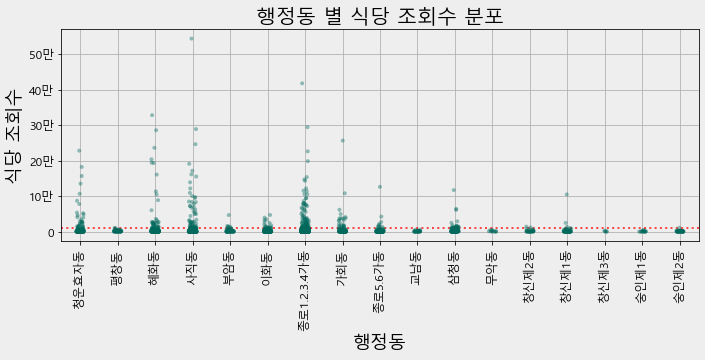

In [485]:
fig,ax = plt.subplots(figsize = (12,6), facecolor = '#eeeeee')
fig.tight_layout(pad = 10)
ax.set_facecolor('#eeeeee')

xlabel = jongro['행정동']
ylabel = jongro['식당조회수']

# colors = ['red' if (y > dong_dict[x]) else 'blue' for (x, y) in zip(xlabel, ylabel)]
# colors = []
# for i in range(len(jongro)):
#     if jongro.loc[i, '식당조회수'] > dong_dict[jongro['행정동'][i]]:
#         colors.append('red')
#     else:
#         colors.append('blue')

sns.stripplot(data = jongro, y = ylabel, x = xlabel, size =4, color = '#00695c', alpha = 0.4)


ax.set_yticks([0,100000,200000,300000,400000,500000])
ax.set_yticklabels(['0', '10만', '20만', '30만', '40만', '50만'], fontsize = 12)
ax.set_ylabel('식당 조회수', fontsize= 18)
ax.set_xticklabels(['청운효자동', '평창동', '혜화동', '사직동', '부암동', '이화동', '종로1.2.3.4가동', '가회동',
       '종로5.6가동', '교남동', '삼청동', '무악동', '창신제2동', '창신제1동', '창신제3동', '숭인제1동',
       '숭인제2동'], rotation = 90, fontsize= 12)
ax.set_xlabel('행정동', fontsize =18)
# ax.set_yticks([0])
# ax.set_yticklabels(['종로구'], fontsize = 20, rotation = 90)
ax.grid()
ax.set_title('행정동 별 식당 조회수 분포', fontsize = 20)
ax.axhline(y = 10000, linestyle = ':', color = 'red', linewidth = 2, alpha = 0.7)
# fig.savefig('식당 조회수 분포.png', dpi = 300)
plt.show()

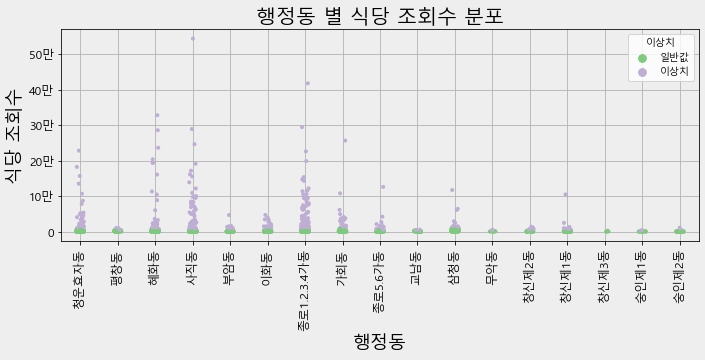

In [475]:
fig,ax = plt.subplots(figsize = (12,6), facecolor = '#eeeeee')
fig.tight_layout(pad = 10)
ax.set_facecolor('#eeeeee')

xlabel = jongro['행정동']
ylabel = jongro['식당조회수']

# colors = ['red' if (y > dong_dict[x]) else 'blue' for (x, y) in zip(xlabel, ylabel)]
# colors = []
# for i in range(len(jongro)):
#     if jongro.loc[i, '식당조회수'] > dong_dict[jongro['행정동'][i]]:
#         colors.append('red')
#     else:
#         colors.append('blue')

sns.set_palette('Accent', 3)
sns.stripplot(data = jongro, y = ylabel, x = xlabel, size =4, hue = '이상치')


ax.set_yticks([0,100000,200000,300000,400000,500000])
ax.set_yticklabels(['0', '10만', '20만', '30만', '40만', '50만'], fontsize = 12)
ax.set_ylabel('식당 조회수', fontsize= 18)
ax.set_xticklabels(['청운효자동', '평창동', '혜화동', '사직동', '부암동', '이화동', '종로1.2.3.4가동', '가회동',
       '종로5.6가동', '교남동', '삼청동', '무악동', '창신제2동', '창신제1동', '창신제3동', '숭인제1동',
       '숭인제2동'], rotation = 90, fontsize= 12)
ax.set_xlabel('행정동', fontsize =18)
# ax.set_yticks([0])
# ax.set_yticklabels(['종로구'], fontsize = 20, rotation = 90)
ax.grid()
ax.set_title('행정동 별 식당 조회수 분포', fontsize = 20)
# ax.axhline(y = 10000, linestyle = '--', color = 'red', linewidth = 2)
# fig.savefig('식당 조회수 분포 빨간선 없이.png', dpi = 300)
plt.show()

In [386]:
jongro[jongro['식당조회수'] < 10000]

기준년월          식당ID      식당명        지점명         대표전화번호  \
0     202004.0  4j340iXbHfWV      지화자        NaN   02-2269-5834   
1     202004.0  18OamX80CFHS      두레유        2호점   02-3217-1090   
2     202004.0  e9yvIwSEPkjC      프쉬케        NaN   02-6465-1746   
3     202004.0  2pjUZsg1qq23  라뜰리에 꼼때        NaN  010-7453-0010   
4     202004.0  RtI1FKG_HlvK    가든테라스  포시즌스호텔 서울   02-6388-5000   
...        ...           ...      ...        ...            ...   
3619  202004.0  36fMy0SuTICT       문벅        NaN    02-762-9190   
3620  202004.0  u5W4wTofGJWA     북촌해물        NaN    02-737-0205   
3621  202004.0    5AkF4cpuuS     송림식당        NaN   02-3672-6529   
3622  202004.0    0N2lu7G1FQ     썬더치킨       동대문점    02-765-6044   
3623  202004.0    AYoKM3JoUY      비틀즈        NaN   02-2232-9980   

                 식당지번주소               식당도로명주소    식당위도좌표값     식당경도좌표값  \
0        서울시 종로구 청운동 48    서울특별시 종로구 자하문로 125  37.587107  126.969393   
1        서울시 종로구 평창동 97    서울특별시 종로구 평창30길 28  37.612224  126.975203   
2     서울시 종로구 통인동 149-5   서울특별시 종로구 자하문로7길 24  37.578904  126.970772   
3      서울시 종로구 명륜1가 1-5  서울특별시 종로구 성균관로17길 53  37.591390  126.997284   
4        서울시 종로구 당주동 30     서울특별시 종로구 새문안로 97  37.570776  126.975422   
...                 ...                   ...        ...         ...   
3619   서울시 종로구 동숭동 25-5     서울특별시 종로구 동숭길 100  37.582765  127.004368   
3620    서울시 종로구 재동 27-1    서울특별시 종로구 북촌로5길 10  37.579066  126.984838   
3621   서울시 종로구 창신동 73-2    서울특별시 종로구 지봉로7길 12  37.575005  127.015282   
3622  서울시 종로구 창신동 17-12      서울특별시 종로구 지봉로 91  37.578251  127.015152   
3623  서울시 종로구 숭인동 212-5    서울특별시 종로구 종로 376-2  37.573776  127.019279   

     1인당가격만원단위구간값 음식대분류명            음식소분류명  식당평점값  식당리뷰수   식당조회수  식당방문희망건수  \
0          4만원 이상     한식  한정식 / 백반 / 정통 한식    NaN    0.0   558.0       5.0   
1          4만원 이상     한식             퓨전 한식    NaN    0.0  2623.0      27.0   
2          4만원 이상     양식              이탈리안    NaN    0.0   751.0       5.0   
3          4만원 이상     양식            프랑스 음식    NaN    0.0  1415.0      25.0   
4          4만원 이상     뷔페                뷔페    NaN    0.0   831.0       4.0   
...           ...    ...               ...    ...    ...     ...       ...   
3619          NaN     주점        전통 주점 / 포차    NaN    5.0  3239.0      26.0   
3620          NaN     한식            해산물 요리    NaN    6.0  5796.0      67.0   
3621          NaN     한식             기타 한식    NaN    0.0   813.0       2.0   
3622          NaN     주점       치킨 / 호프 / 펍    NaN    0.0   779.0       0.0   
3623          NaN     카페          카페 / 디저트    NaN    0.0   399.0       2.0   

        구     동    행정동  1인당비용코드  
0     종로구   청운동  청운효자동      5.0  
1     종로구   평창동    평창동      5.0  
2     종로구   통인동  청운효자동      5.0  
3     종로구  명륜1가    혜화동      5.0  
4     종로구   당주동    사직동      5.0  
...   ...   ...    ...      ...  
3619  종로구   동숭동    이화동      2.0  
3620  종로구    재동    가회동      2.0  
3621  종로구   창신동  창신제1동      1.0  
3622  종로구   창신동  창신제3동      2.0  
3623  종로구   숭인동  숭인제2동      1.0  

[3298 rows x 20 columns]

In [212]:
visit.loc[[1,2,6,13], '식당조회수(이상치)'] = 0

In [215]:
num = 0
for i in range(len(visit)):
    if visit.loc[i,'식당조회수(이상치)'] != 0:
        visit.loc[i,'식당조회수(이상치)'] = visit_outlier.loc[num, '식당조회수']
        num += 1

In [491]:
jongro_st2 = jongro[jongro['이상치'] != '이상치']

In [510]:
jongro_st2 = jongro_st2.groupby('행정동', as_index = False).agg({'식당조회수' :'mean'})

In [519]:
jongro_ot2 = jongro[jongro['이상치'] == '이상치']
jongro_ot2 = jongro_ot2.groupby('행정동', as_index = False).agg({'식당조회수' :'mean'})

In [533]:
jongro_ot_count = jongro[jongro['이상치'] == '이상치']
jongro_ot_count = jongro_ot_count.groupby('행정동', as_index = False).agg({'식당조회수' :'count'})

In [534]:
jongro_st_count = jongro[jongro['이상치'] != '이상치']
jongro_st_count = jongro_st_count.groupby('행정동', as_index = False).agg({'식당조회수' :'count'})

In [535]:
visit['식당조회수(일반값 개수)'] = jongro_st_count['식당조회수']

In [537]:
visit['이상치 비율'] = ''
for i in range(len(visit)):
    a = visit.loc[i, '식당조회수(이상치 개수)']
    b = visit.loc[i, '식당조회수(일반값 개수)']
    visit['이상치 비율'][i] = a/(a+b)*100

<ipython-input-537-ef8ff8707d37>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visit['이상치 비율'][i] = a/(a+b)*100


In [616]:
visit

행정동        식당조회수    식당조회수(이상치)  식당조회수(이상치 제외)  식당조회수(이상치 제외2)  \
0           가회동  7469.521212  35330.785714    1775.248175     1905.514286   
1           교남동  1433.107143      0.000000    1433.107143     1108.346154   
2           무악동  1823.909091      0.000000    1823.909091     1103.333333   
3           부암동  3701.891892  13953.000000    1717.806452     1975.076923   
4           사직동  9010.323689  52169.189873    1817.179325     1873.910230   
5           삼청동  5589.372781  17910.500000    2254.330827     3225.292208   
6          숭인1동  1296.466667      0.000000    1296.466667      886.538462   
7          숭인2동  1379.272727  11442.000000    1145.255814      913.692308   
8           이화동  3675.945205  16656.407407    1850.567708     1850.567708   
9   종로1·2·3·4가동  5677.077036  35246.857143    1910.537634     1906.288079   
10      종로5·6가동  3321.687151  27014.583333    1619.203593     1373.740506   
11         창신1동  3919.217391  23331.500000    1373.344262     1043.438596   
12         창신2동  2710.266667  11759.000000    1704.851852     1310.800000   
13         창신3동  1228.200000      0.000000    1228.200000      792.250000   
14        청운효자동  9228.054299      0.000000    1833.229508     1900.843243   
15          평창동  2395.492308      0.000000    2131.396825     1936.416667   
16          혜화동  7999.193237      0.000000    1924.528767     1896.732782   

     식당조회수(이상치2)  식당조회수(이상치 개수)  식당조회수(일반값 개수)     이상치 비율  총 가게수  
0   38627.960000             25            140  15.151515    165  
1    5655.000000              2             26   7.142857     28  
2    5066.500000              2              9  18.181818     11  
3   16173.333333              9             65  12.162162     74  
4   55204.135135             74            479  13.381555    553  
5   29860.600000             15            154   8.875740    169  
6    3961.000000              2             13  13.333333     15  
7    5010.800000              5             39  11.363636     44  
8   16656.407407             27            192  12.328767    219  
9   35064.903226            155           1208  11.371974   1363  
10  17977.666667             21            158  11.731844    179  
11  17579.166667             12             57  17.391304     69  
12   9707.600000              5             25  16.666667     30  
13   2972.000000              1              4  20.000000      5  
14  46881.777778             36            185  16.289593    221  
15   7904.400000              5             60   7.692308     65  
16  51434.352941             51            363  12.318841    414

In [618]:
visit.sort_values(by = '이상치 비율', ascending = False
                )

행정동        식당조회수    식당조회수(이상치)  식당조회수(이상치 제외)  식당조회수(이상치 제외2)  \
13         창신3동  1228.200000      0.000000    1228.200000      792.250000   
2           무악동  1823.909091      0.000000    1823.909091     1103.333333   
11         창신1동  3919.217391  23331.500000    1373.344262     1043.438596   
12         창신2동  2710.266667  11759.000000    1704.851852     1310.800000   
14        청운효자동  9228.054299      0.000000    1833.229508     1900.843243   
0           가회동  7469.521212  35330.785714    1775.248175     1905.514286   
4           사직동  9010.323689  52169.189873    1817.179325     1873.910230   
6          숭인1동  1296.466667      0.000000    1296.466667      886.538462   
8           이화동  3675.945205  16656.407407    1850.567708     1850.567708   
16          혜화동  7999.193237      0.000000    1924.528767     1896.732782   
3           부암동  3701.891892  13953.000000    1717.806452     1975.076923   
10      종로5·6가동  3321.687151  27014.583333    1619.203593     1373.740506   
9   종로1·2·3·4가동  5677.077036  35246.857143    1910.537634     1906.288079   
7          숭인2동  1379.272727  11442.000000    1145.255814      913.692308   
5           삼청동  5589.372781  17910.500000    2254.330827     3225.292208   
15          평창동  2395.492308      0.000000    2131.396825     1936.416667   
1           교남동  1433.107143      0.000000    1433.107143     1108.346154   

     식당조회수(이상치2)  식당조회수(이상치 개수)  식당조회수(일반값 개수)     이상치 비율  총 가게수  
13   2972.000000              1              4  20.000000      5  
2    5066.500000              2              9  18.181818     11  
11  17579.166667             12             57  17.391304     69  
12   9707.600000              5             25  16.666667     30  
14  46881.777778             36            185  16.289593    221  
0   38627.960000             25            140  15.151515    165  
4   55204.135135             74            479  13.381555    553  
6    3961.000000              2             13  13.333333     15  
8   16656.407407             27            192  12.328767    219  
16  51434.352941             51            363  12.318841    414  
3   16173.333333              9             65  12.162162     74  
10  17977.666667             21            158  11.731844    179  
9   35064.903226            155           1208  11.371974   1363  
7    5010.800000              5             39  11.363636     44  
5   29860.600000             15            154   8.875740    169  
15   7904.400000              5             60   7.692308     65  
1    5655.000000              2             26   7.142857     28

In [570]:
visit['이상치 비율'] = visit['이상치 비율'].astype(float)

In [581]:
a = visit[['행정동', '식당조회수', '식당조회수(이상치 제외2)', '식당조회수(이상치2)', '이상치 비율']]

In [586]:
a.columns =['행정동', '전체 조회수 평균', '이상치 제외한 조회수 평균', 
              '이상치 조회수 평균', 
             '전체 가게 대비 이상치 가게 비율']

In [608]:
merge_data = pd.read_csv('merge.csv')

In [611]:
a['개업수'] = merge_data['상가업소번호']

In [619]:
a['총 가게 수'] = visit['총 가게수']

In [620]:
a

행정동    전체 조회수 평균  이상치 제외한 조회수 평균    이상치 조회수 평균  \
0           가회동  7469.521212     1905.514286  38627.960000   
1           교남동  1433.107143     1108.346154   5655.000000   
2           무악동  1823.909091     1103.333333   5066.500000   
3           부암동  3701.891892     1975.076923  16173.333333   
4           사직동  9010.323689     1873.910230  55204.135135   
5           삼청동  5589.372781     3225.292208  29860.600000   
6          숭인1동  1296.466667      886.538462   3961.000000   
7          숭인2동  1379.272727      913.692308   5010.800000   
8           이화동  3675.945205     1850.567708  16656.407407   
9   종로1·2·3·4가동  5677.077036     1906.288079  35064.903226   
10      종로5·6가동  3321.687151     1373.740506  17977.666667   
11         창신1동  3919.217391     1043.438596  17579.166667   
12         창신2동  2710.266667     1310.800000   9707.600000   
13         창신3동  1228.200000      792.250000   2972.000000   
14        청운효자동  9228.054299     1900.843243  46881.777778   
15          평창동  2395.492308     1936.416667   7904.400000   
16          혜화동  7999.193237     1896.732782  51434.352941   

    전체 가게 대비 이상치 가게 비율  개업수  총 가게 수  
0            15.151515   10     165  
1             7.142857   13      28  
2            18.181818    1      11  
3            12.162162    6      74  
4            13.381555   60     553  
5             8.875740   19     169  
6            13.333333    2      15  
7            11.363636    7      44  
8            12.328767   15     219  
9            11.371974  140    1363  
10           11.731844   24     179  
11           17.391304   10      69  
12           16.666667   10      30  
13           20.000000    2       5  
14           16.289593   16     221  
15            7.692308    9      65  
16           12.318841   28     414

In [622]:
a['개업률'] = a['개업수']/a['총 가게 수']*100

In [623]:
a

행정동    전체 조회수 평균  이상치 제외한 조회수 평균    이상치 조회수 평균  \
0           가회동  7469.521212     1905.514286  38627.960000   
1           교남동  1433.107143     1108.346154   5655.000000   
2           무악동  1823.909091     1103.333333   5066.500000   
3           부암동  3701.891892     1975.076923  16173.333333   
4           사직동  9010.323689     1873.910230  55204.135135   
5           삼청동  5589.372781     3225.292208  29860.600000   
6          숭인1동  1296.466667      886.538462   3961.000000   
7          숭인2동  1379.272727      913.692308   5010.800000   
8           이화동  3675.945205     1850.567708  16656.407407   
9   종로1·2·3·4가동  5677.077036     1906.288079  35064.903226   
10      종로5·6가동  3321.687151     1373.740506  17977.666667   
11         창신1동  3919.217391     1043.438596  17579.166667   
12         창신2동  2710.266667     1310.800000   9707.600000   
13         창신3동  1228.200000      792.250000   2972.000000   
14        청운효자동  9228.054299     1900.843243  46881.777778   
15          평창동  2395.492308     1936.416667   7904.400000   
16          혜화동  7999.193237     1896.732782  51434.352941   

    전체 가게 대비 이상치 가게 비율  개업수  총 가게 수        개업률  
0            15.151515   10     165   6.060606  
1             7.142857   13      28  46.428571  
2            18.181818    1      11   9.090909  
3            12.162162    6      74   8.108108  
4            13.381555   60     553  10.849910  
5             8.875740   19     169  11.242604  
6            13.333333    2      15  13.333333  
7            11.363636    7      44  15.909091  
8            12.328767   15     219   6.849315  
9            11.371974  140    1363  10.271460  
10           11.731844   24     179  13.407821  
11           17.391304   10      69  14.492754  
12           16.666667   10      30  33.333333  
13           20.000000    2       5  40.000000  
14           16.289593   16     221   7.239819  
15            7.692308    9      65  13.846154  
16           12.318841   28     414   6.763285

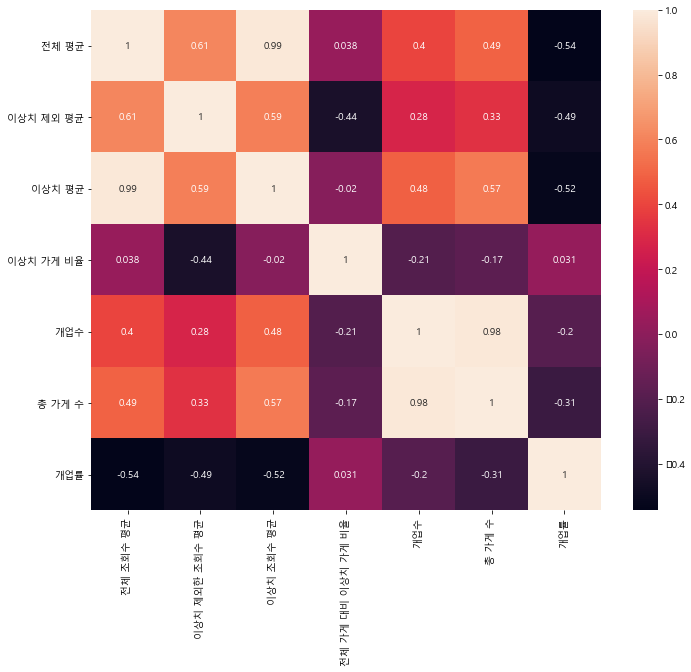

In [626]:
fig, ax = plt.subplots(figsize = (12,10))
fig.tight_layout(pad = 10)
ax.set_facecolor('#eeeeee')

sns.heatmap(a.corr(), annot = True)

ax.set_yticklabels(['전체 평균','이상치 제외 평균','이상치 평균','이상치 가게 비율','개업수', '총 가게 수', '개업률' ])
# plt.savefig('상관관계.png', dpi= 300)
plt.show()

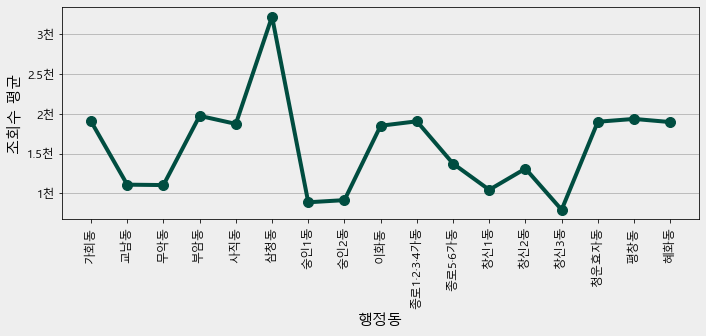

In [559]:
fig, ax = plt.subplots(figsize = (12,6), facecolor = '#eeeeee')
fig.tight_layout(pad = 10)
ax.set_facecolor('#eeeeee')

ax.plot(visit['행정동'], visit['식당조회수(이상치 제외2)'], marker = 'o', linewidth = 4, markersize= 10, color = '#004d40')
ax.set_xticklabels(visit['행정동'], rotation = 90, fontsize = 12)
ax.set_yticks([1000,1500,2000,2500,3000])
ax.set_yticklabels(['1천', '1.5천', '2천', '2.5천', '3천'], fontsize= 12)

ax.set_ylabel('조회수 평균', fontsize= 15)
ax.set_xlabel('행정동', fontsize= 15)
ax.grid(axis = 'y')
plt.savefig('지역별 조회수 평균(이상치 제외)', dpi = 300)
plt.show()

In [628]:
a

행정동    전체 조회수 평균  이상치 제외한 조회수 평균    이상치 조회수 평균  \
0           가회동  7469.521212     1905.514286  38627.960000   
1           교남동  1433.107143     1108.346154   5655.000000   
2           무악동  1823.909091     1103.333333   5066.500000   
3           부암동  3701.891892     1975.076923  16173.333333   
4           사직동  9010.323689     1873.910230  55204.135135   
5           삼청동  5589.372781     3225.292208  29860.600000   
6          숭인1동  1296.466667      886.538462   3961.000000   
7          숭인2동  1379.272727      913.692308   5010.800000   
8           이화동  3675.945205     1850.567708  16656.407407   
9   종로1·2·3·4가동  5677.077036     1906.288079  35064.903226   
10      종로5·6가동  3321.687151     1373.740506  17977.666667   
11         창신1동  3919.217391     1043.438596  17579.166667   
12         창신2동  2710.266667     1310.800000   9707.600000   
13         창신3동  1228.200000      792.250000   2972.000000   
14        청운효자동  9228.054299     1900.843243  46881.777778   
15          평창동  2395.492308     1936.416667   7904.400000   
16          혜화동  7999.193237     1896.732782  51434.352941   

    전체 가게 대비 이상치 가게 비율  개업수  총 가게 수        개업률  
0            15.151515   10     165   6.060606  
1             7.142857   13      28  46.428571  
2            18.181818    1      11   9.090909  
3            12.162162    6      74   8.108108  
4            13.381555   60     553  10.849910  
5             8.875740   19     169  11.242604  
6            13.333333    2      15  13.333333  
7            11.363636    7      44  15.909091  
8            12.328767   15     219   6.849315  
9            11.371974  140    1363  10.271460  
10           11.731844   24     179  13.407821  
11           17.391304   10      69  14.492754  
12           16.666667   10      30  33.333333  
13           20.000000    2       5  40.000000  
14           16.289593   16     221   7.239819  
15            7.692308    9      65  13.846154  
16           12.318841   28     414   6.763285

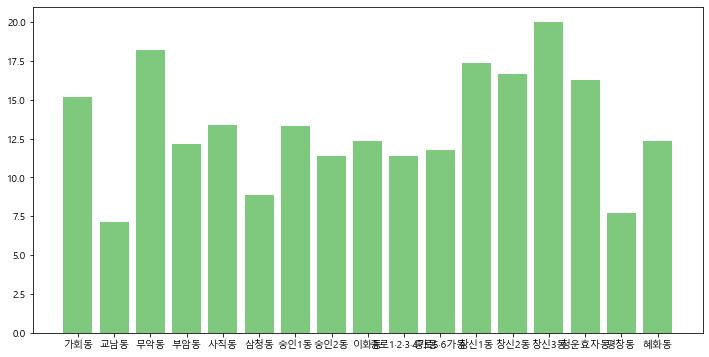

In [634]:


fig, ax = plt.subplots(figsize = (12,6))
colors = ['#546e7a' if (y<16) else '#00897b' for y in ylabel]
ax.bar(data = a, x = '행정동', height = '전체 가게 대비 이상치 가게 비율')
plt.show()

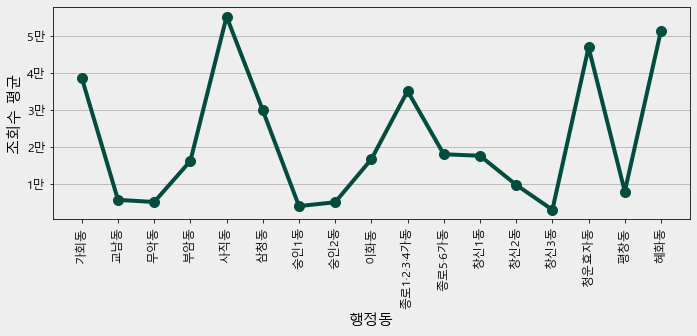

In [560]:
fig, ax = plt.subplots(figsize = (12,6), facecolor = '#eeeeee')
fig.tight_layout(pad = 10)
ax.set_facecolor('#eeeeee')

ax.plot(visit['행정동'], visit['식당조회수(이상치2)'], marker = 'o', linewidth = 4, markersize= 10, color = '#004d40')
ax.set_xticklabels(visit['행정동'], rotation = 90, fontsize = 12)
ax.set_yticks([10000,20000,30000,40000,50000])
ax.set_yticklabels(['1만', '2만', '3만', '4만', '5만'], fontsize= 12)

ax.set_ylabel('조회수 평균', fontsize= 15)
ax.set_xlabel('행정동', fontsize= 15)
ax.grid(axis = 'y')
plt.savefig('지역별 이상치 평균', dpi = 300)
plt.show()

In [383]:
jongro_outlier['행정동'].value_counts()

종로1.2.3.4가동    154
사직동             79
혜화동             49
청운효자동           38
삼청동             36
가회동             28
이화동             27
종로5.6가동         12
부암동             12
창신제1동            8
창신제2동            3
평창동              2
숭인제2동            1
Name: 행정동, dtype: int64

In [517]:
m = folium.Map(location = center, zoom_start = 14, tiles = 'Stamen Terrain')
folium.Choropleth(
    geo_data = json_data2,
    data = visit,
    columns = ['행정동', '식당조회수'],
    fill_color = 'PuRd',
    key_on = 'properties.dong_name',
    highlight = True,
    fill_opacity = 0.7,line_opacity = 1,
    legend = False,
    bins = 8
).add_to(m)
m

In [518]:
m = folium.Map(location = center, zoom_start = 14, tiles = 'Stamen Terrain')
folium.Choropleth(
    geo_data = json_data2,
    data = visit,
    columns = ['행정동', '식당조회수(이상치 제외2)'],
    fill_color = 'PuRd',
    key_on = 'properties.dong_name',
    highlight = True,
    fill_opacity = 0.7,line_opacity = 1,
    legend_name = '',
    bins = 8
).add_to(m)
m

In [524]:
m = folium.Map(location = center, zoom_start = 14, tiles = 'Stamen Terrain')
folium.Choropleth(
    geo_data = json_data2,
    data = visit,
    columns = ['행정동', '식당조회수(이상치2)'],
    fill_color = 'PuRd',
    key_on = 'properties.dong_name',
    highlight = True,
    fill_opacity = 0.7,line_opacity = 1,
    legend_name = '식당 조회수(평균)',
    bins = 8
).add_to(m)
m

In [540]:
m = folium.Map(location = center, zoom_start = 14, tiles = 'Stamen Terrain')
folium.Choropleth(
    geo_data = json_data2,
    data = visit,
    columns = ['행정동', '이상치 비율'],
    fill_color = 'PuRd',
    key_on = 'properties.dong_name',
    highlight = True,
    fill_opacity = 0.7,line_opacity = 1,
    legend_name = '',
    bins = 8
).add_to(m)
m

In [25]:
latitude_m = loc['식당위도좌표값'].mean() # 위도 평균
longtitude_m = loc['식당경도좌표값'].mean() # 경도 평균
center = [latitude_m, longtitude_m]
m = folium.Map(location = center, zoom_start = 14, tiles = 'Stamen Terrain')

folium.Choropleth(
geo_data = json_data2,
fill_color = '#fff8e1').add_to(m)

for i in range(len(loc)):
    folium.Circle(
    location = loc.loc[i,['식당위도좌표값', '식당경도좌표값']],
    tooltip = loc.loc[0,'식당명'],
    radius = 20,
    color = None,
    fill = True,
    fill_color = '#dd2c00',
    fill_opacity = 0.2
    ).add_to(m)
m


In [176]:
jongro = pd.read_csv('종로 식당 중간저장.csv')

In [177]:
jongro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3624 non-null   int64  
 1   기준년월          3477 non-null   float64
 2   식당ID          3624 non-null   object 
 3   식당명           3624 non-null   object 
 4   지점명           949 non-null    object 
 5   대표전화번호        3465 non-null   object 
 6   식당지번주소        3624 non-null   object 
 7   식당도로명주소       3624 non-null   object 
 8   식당위도좌표값       3624 non-null   float64
 9   식당경도좌표값       3624 non-null   float64
 10  1인당가격만원단위구간값  3582 non-null   object 
 11  음식대분류명        3624 non-null   object 
 12  음식소분류명        3624 non-null   object 
 13  주차구분명         2727 non-null   object 
 14  식당영업시간값       2793 non-null   object 
 15  식당평점값         535 non-null    float64
 16  식당리뷰수         3624 non-null   float64
 17  식당조회수         3624 non-null   float64
 18  식당방문희망건수      3624 non-null 

In [178]:
jongro.columns

Index(['Unnamed: 0', '기준년월', '식당ID', '식당명', '지점명', '대표전화번호', '식당지번주소',
       '식당도로명주소', '식당위도좌표값', '식당경도좌표값', '1인당가격만원단위구간값', '음식대분류명', '음식소분류명',
       '주차구분명', '식당영업시간값  ', '식당평점값', '식당리뷰수', '식당조회수', '식당방문희망건수', '탑리스트ID',
       '탑리스트타이틀', '탑리스트설명', '탑리스트내순위', '구', '동', '행정동', '1인당비용코드'],
      dtype='object')

In [179]:
jongro.drop(['Unnamed: 0', '주차구분명', '식당영업시간값  ', '탑리스트ID', '탑리스트타이틀', '탑리스트설명', '탑리스트내순위'], axis = 1 , inplace = True)

In [180]:
jongro.head(5)

기준년월          식당ID      식당명        지점명         대표전화번호  \
0  202004.0  4j340iXbHfWV      지화자        NaN   02-2269-5834   
1  202004.0  18OamX80CFHS      두레유        2호점   02-3217-1090   
2  202004.0  e9yvIwSEPkjC      프쉬케        NaN   02-6465-1746   
3  202004.0  2pjUZsg1qq23  라뜰리에 꼼때        NaN  010-7453-0010   
4  202004.0  RtI1FKG_HlvK    가든테라스  포시즌스호텔 서울   02-6388-5000   

              식당지번주소               식당도로명주소    식당위도좌표값     식당경도좌표값  \
0     서울시 종로구 청운동 48    서울특별시 종로구 자하문로 125  37.587107  126.969393   
1     서울시 종로구 평창동 97    서울특별시 종로구 평창30길 28  37.612224  126.975203   
2  서울시 종로구 통인동 149-5   서울특별시 종로구 자하문로7길 24  37.578904  126.970772   
3   서울시 종로구 명륜1가 1-5  서울특별시 종로구 성균관로17길 53  37.591390  126.997284   
4     서울시 종로구 당주동 30     서울특별시 종로구 새문안로 97  37.570776  126.975422   

  1인당가격만원단위구간값 음식대분류명            음식소분류명  식당평점값  식당리뷰수   식당조회수  식당방문희망건수    구  \
0       4만원 이상     한식  한정식 / 백반 / 정통 한식    NaN    0.0   558.0       5.0  종로구   
1       4만원 이상     한식             퓨전 한식    NaN    0.0  2623.0      27.0  종로구   
2       4만원 이상     양식              이탈리안    NaN    0.0   751.0       5.0  종로구   
3       4만원 이상     양식            프랑스 음식    NaN    0.0  1415.0      25.0  종로구   
4       4만원 이상     뷔페                뷔페    NaN    0.0   831.0       4.0  종로구   

      동    행정동  1인당비용코드  
0   청운동  청운효자동      5.0  
1   평창동    평창동      5.0  
2   통인동  청운효자동      5.0  
3  명륜1가    혜화동      5.0  
4   당주동    사직동      5.0

In [181]:
jongro.describe()

기준년월      식당위도좌표값      식당경도좌표값       식당평점값        식당리뷰수  \
count    3477.0  3624.000000  3624.000000  535.000000  3624.000000   
mean   202004.0    37.576610   126.986432    3.797944     6.190121   
std         0.0     0.007279     0.013096    0.378564    20.617356   
min    202004.0    37.567427   126.955211    2.700000     0.000000   
25%    202004.0    37.571407   126.975403    3.500000     0.000000   
50%    202004.0    37.574430   126.985362    3.800000     2.000000   
75%    202004.0    37.580538   126.998116    4.100000     5.000000   
max    202004.0    37.615922   127.023149    4.700000   457.000000   

               식당조회수      식당방문희망건수      1인당비용코드  
count    3624.000000   3624.000000  3624.000000  
mean     6229.626656    160.209713     1.662804  
std     23512.632478    662.721499     0.878791  
min        50.000000      0.000000     1.000000  
25%       849.000000      2.000000     1.000000  
50%      1640.000000     11.000000     1.000000  
75%      3337.000000     49.000000     2.000000  
max    544696.000000  10146.000000     5.000000

###  식당 조회수의 분포가 이상한듯

In [182]:
jongro['1인당비용코드'].value_counts()

1.0    1918
2.0    1235
3.0     319
4.0      79
5.0      73
Name: 1인당비용코드, dtype: int64

In [183]:
jongro['음식대분류명'].value_counts()

한식      1578
카페       908
주점       329
양식       273
일식       255
중식       157
세계음식     101
뷔페        23
Name: 음식대분류명, dtype: int64

In [86]:
for i in range(len(jongro)):
    if jongro.loc[i, '행정동'] == '창신제1동':
        jongro.loc[i, '행정동'] = '창신동'
    elif jongro.loc[i, '행정동'] == '창신제2동':
        jongro.loc[i, '행정동'] = '창신동'
    elif jongro.loc[i, '행정동'] == '창신제3동':
        jongro.loc[i, '행정동'] = '창신동'
    elif jongro.loc[i, '행정동'] == '숭인제1동':
        jongro.loc[i, '행정동'] = '숭인동'
    elif jongro.loc[i, '행정동'] == '숭인제2동':
        jongro.loc[i, '행정동'] = '숭인동'
    else:
        pass

In [87]:
jongro['행정동'].value_counts()

종로1.2.3.4가동    1363
사직동             553
혜화동             414
청운효자동           221
이화동             219
종로5.6가동         179
삼청동             169
가회동             165
창신동             104
부암동              74
평창동              65
숭인동              59
교남동              28
무악동              11
Name: 행정동, dtype: int64

In [88]:
def large_cat_plot(cat, name):
    df = jongro[jongro[cat] == name]
    
    plt.figure(figsize = (12,8))
    sns.countplot(x = '행정동', data = df)
    plt.xticks(rotation = 30)

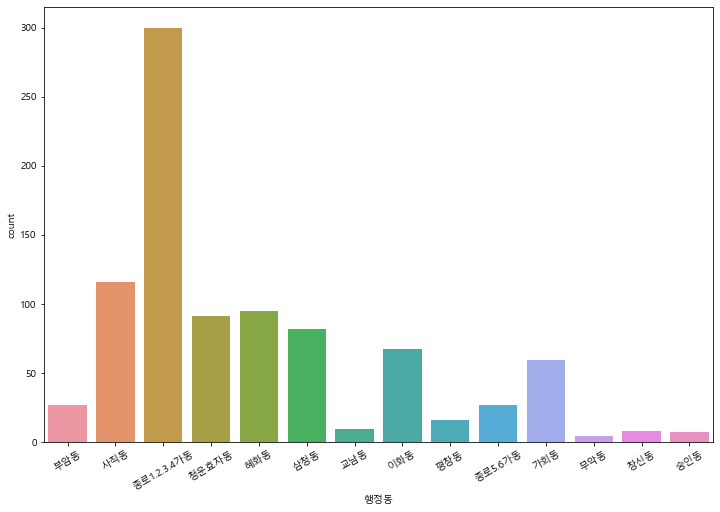

In [89]:
large_cat_plot('음식대분류명','카페')
plt.show()

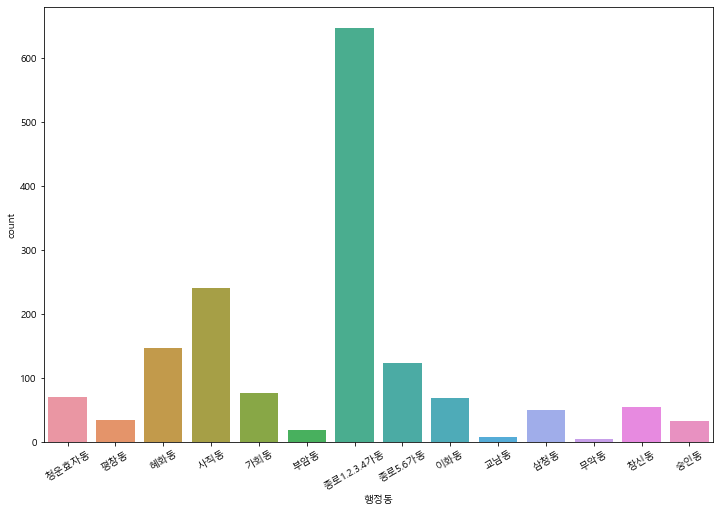

In [90]:
large_cat_plot('음식대분류명','한식')
plt.show()

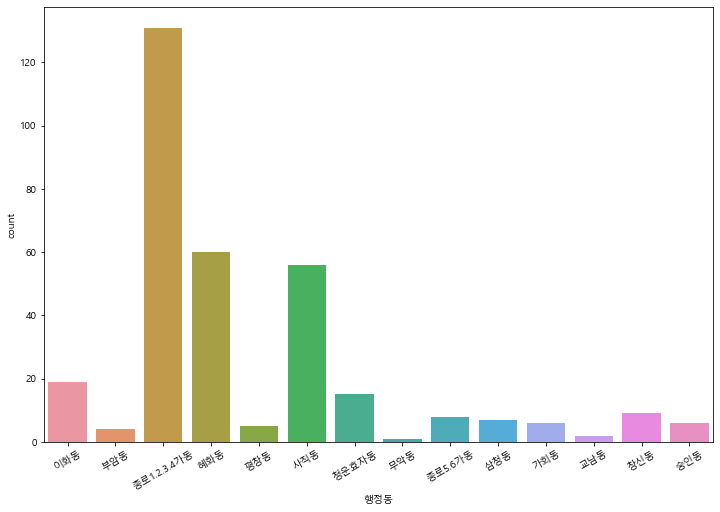

In [91]:
large_cat_plot('음식대분류명','주점')
plt.show()

In [93]:
Q1 = jongro.describe().loc['25%','식당조회수']
Q3 = jongro.describe().loc['75%', '식당조회수']
iqr = Q3 - Q1
outlier_st = Q3 + iqr*1.5
outlier_st

7069.0

In [148]:
jongro_outlier = jongro[jongro['식당조회수'] > outlier_st]

In [150]:
jongro_st = jongro.drop(jongro_outlier.index)

In [165]:
jongro_st.groupby('행정동', as_index = False).agg({'식당조회수' : ['mean', 'count']}).sort_values(by = ('식당조회수', 'mean'), ascending = False)

행정동        식당조회수      
                        mean count
5           삼청동  2254.330827   133
12          평창동  2131.396825    63
13          혜화동  1924.528767   365
8   종로1.2.3.4가동  1910.537634  1209
7           이화동  1850.567708   192
11        청운효자동  1833.229508   183
2           무악동  1823.909091    11
4           사직동  1817.179325   474
0           가회동  1775.248175   137
3           부암동  1717.806452    62
9       종로5.6가동  1619.203593   167
10          창신동  1461.784946    93
1           교남동  1433.107143    28
6           숭인동  1184.362069    58

In [163]:
jongro_outlier.groupby('행정동', as_index = False).agg({'식당조회수' : ['mean', 'count']}).sort_values(by = ('식당조회수',  'mean'), ascending = False)

행정동         식당조회수      
                         mean count
11          혜화동  53249.244898    49
2           사직동  52169.189873    79
9         청운효자동  44839.973684    38
0           가회동  35330.785714    28
6   종로1.2.3.4가동  35246.857143   154
7       종로5.6가동  27014.583333    12
8           창신동  20175.363636    11
3           삼청동  17910.500000    36
5           이화동  16656.407407    27
1           부암동  13953.000000    12
4           숭인동  11442.000000     1
10          평창동  10714.500000     2

In [164]:
jongro_outlier.groupby('행정동', as_index = False).agg({'식당조회수' : ['mean', 'count']}).sort_values(by = ('식당조회수',  'count'), ascending = False)

행정동         식당조회수      
                         mean count
6   종로1.2.3.4가동  35246.857143   154
2           사직동  52169.189873    79
11          혜화동  53249.244898    49
9         청운효자동  44839.973684    38
3           삼청동  17910.500000    36
0           가회동  35330.785714    28
5           이화동  16656.407407    27
1           부암동  13953.000000    12
7       종로5.6가동  27014.583333    12
8           창신동  20175.363636    11
10          평창동  10714.500000     2
4           숭인동  11442.000000     1

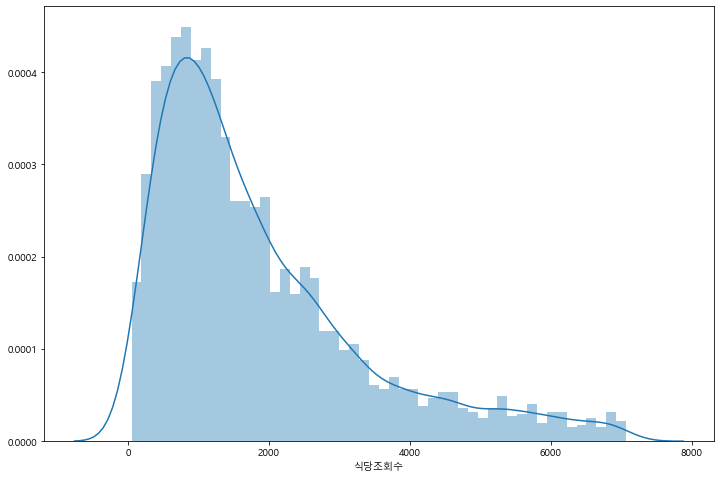

In [95]:
plt.figure(figsize = ( 12 , 8))
sns.distplot(jongro_low_visit['식당조회수'], bins = 50)
plt.show()

In [96]:
visit_list = jongro['식당조회수'].sort_values(ascending = False)[:36].index

In [97]:
jongro.loc[visit_list]

기준년월          식당ID       식당명            지점명         대표전화번호  \
3310   NaN    ba-druB2Lm       오가와            NaN    02-735-1001   
3349   NaN    HVHjj-BrJD        더미         광화문 본점   02-2075-6611   
3407   NaN    DsIDC233ow        정돈           대학로점    02-987-0924   
3277   NaN    RfROMZA_LS      뚝배기집            NaN   02-2265-5744   
3335   NaN    jbXHGq3QwY     폴앤폴리나           광화문점    02-739-5520   
3286   NaN    gKkMeMiEf7    나누미떡볶이            NaN    02-747-0881   
3376   NaN    8lZn8Qcgj2      깡통만두            NaN    02-794-4243   
3280   NaN    0FwTUkRDbF     서촌계단집            NaN    02-737-8412   
3417   NaN    in8ezN7IbJ        깔리            NaN    02-747-5050   
3405   NaN    HRA9FjXQ7Q    갈리나데이지            NaN    02-720-1248   
3366   NaN    oP0yz0EYLj   반짝반짝빛나는            NaN    02-738-4525   
3421   NaN  aqrwpcjP8NCN      호호식당            NaN    02-741-2384   
3389   NaN    IooT-KbZeD     종로돈부리            NaN    02-722-2384   
3298   NaN    rJ6av3SuzP      독일주택            NaN    02-742-1933   
3297   NaN    NUVSiYWVI7     믹스앤몰트            NaN    02-765-5945   
3338   NaN    AdWddi4FyZ     나무사이로            NaN  070-7590-0885   
3409   NaN    c-BO2-JZg1      옥인피자            NaN    02-737-9944   
3352   NaN    KxinsNEdHO    평안도만두집            NaN    02-723-6592   
3281   NaN    Ex276TuZzf    체부동잔치집            NaN    02-730-5420   
3398   NaN  CbWWt2r4FC4b     명륜건강원            NaN    02-741-2344   
3402   NaN    deZBgYhqMb        포담            NaN    02-733-0831   
3354   NaN  Z7XW7OK7rLDi  고가빈커리하우스            NaN    02-722-2224   
3390   NaN    HBoWq8cQd5    황산샤브샤브            NaN    02-725-0050   
3350   NaN  CVVIZy5GXe3_     교대이층집           광화문점    02-723-6692   
3324   NaN    AtNqVtENf9      부촌육회            NaN   02-2267-1831   
3283   NaN    uQsDcx-4h1       야마야            NaN    02-720-8002   
3399   NaN    7pc8IktUzc      누하의숲            NaN    02-733-5632   
3383   NaN    r5ZoupYsk_   비엘티스테이크  JW메리어트 호텔 동대문   02-2276-3330   
3385   NaN    0TkoIX33V9      창신육회            NaN   02-2266-6727   
3355   NaN  uaoz6fxCG-m8   힐사이드테이블            NaN    02-720-5757   
3419   NaN    mBD4XimUat    황생가칼국수            NaN    02-739-6334   
3284   NaN    ltKDCYXWoN        계림            NaN   02-2263-6658   
3303   NaN  QDi7GAeHPRyw       853            NaN  070-8832-0853   
3307   NaN  gSGQ0YCij835     카페키이로            NaN    02-747-0848   
3351   NaN  U3s064HzJEyi        룰스            NaN    02-720-7205   
3378   NaN    QITJKiSkQM       비엣꽌            NaN    02-744-1868   

                   식당지번주소                 식당도로명주소    식당위도좌표값     식당경도좌표값  \
3310        서울시 종로구 당주동 5     서울특별시 종로구 새문안로5길 19  37.572035  126.974497   
3349      서울시 종로구 종로1가 24         서울특별시 종로구 종로 19  37.570667  126.979849   
3407     서울시 종로구 명륜4가 107      서울특별시 종로구 대학로9길 12  37.581813  127.001091   
3277      서울시 종로구 관철동 5-1      서울특별시 종로구 종로16길 12  37.569578  126.988487   
3335       서울시 종로구 내수동 74      서울특별시 종로구 사직로8길 42  37.573898  126.973131   
3286     서울시 종로구 명륜2가 225      서울특별시 종로구 성균관로 9-1  37.583738  126.997885   
3376     서울시 종로구 재동 84-22     서울특별시 종로구 북촌로2길 5-6  37.578154  126.986085   
3280     서울시 종로구 내자동 11-1     서울특별시 종로구 자하문로1길 15  37.576431  126.971479   
3417   서울시 종로구 명륜4가 170-3     서울특별시 종로구 대학로11길 43  37.582450  126.999340   
3405    서울시 종로구 통인동 118-8   서울특별시 종로구 자하문로13길 1-4  37.579896  126.971015   
3366        서울시 종로구 관훈동 6     서울특별시 종로구 인사동길 28-1  37.573305  126.986141   
3421     서울시 종로구 명륜4가 143      서울특별시 종로구 대학로9길 35  37.581907  127.000059   
3389     서울시 종로구 관철동 7-15     서울특별시 종로구 삼일대로15길 6  37.568930  126.987190   
3298    서울시 종로구 명륜4가 45-1     서울특별시 종로구 대명1길 16-4  37.582991  127.000573   
3297   서울시 종로구 명륜3가 154-2     서울특별시 종로구 창경궁로29길 3  37.583109  126.998223   
3338      서울시 종로구 내자동 196      서울특별시 종로구 사직로8길 21  37.574689  126.970972   
3409      서울시 종로구 옥인동 155        서울특별시 종로구 옥인길 26  37.580953  126.967386   
3352      서울시 종로구 내수동 167     서울특별시 종로구 새문안로3길 30  37.572660  126.972997   
3281      서울시 종로구 체부동 190     서울특별시 종로구 자하문로1

In [98]:
jongro.groupby('음식대분류명', as_index = False).agg({'식당리뷰수' : 'mean', '식당조회수' : 'mean', '1인당비용코드' : 'mean', '식당평점값' : 'mean'}).sort_values(by = '식당조회수', ascending = False)

음식대분류명      식당리뷰수         식당조회수   1인당비용코드     식당평점값
1   세계음식  15.445545  14554.653465  1.831683  3.886207
3     일식  10.854902  11437.533333  2.023529  3.848889
2     양식  10.512821   9818.710623  2.043956  3.794366
0     뷔페   7.956522   9393.478261  2.565217  3.625000
5     중식   6.229299   6587.770701  1.496815  3.777778
7     한식   4.919518   5439.993029  1.802915  3.820238
4     주점   4.243161   5322.474164  2.048632  3.855814
6     카페   5.412996   4320.853524  1.050661  3.733108

In [99]:
jongro['음식대분류명'].value_counts()

한식      1578
카페       908
주점       329
양식       273
일식       255
중식       157
세계음식     101
뷔페        23
Name: 음식대분류명, dtype: int64

In [100]:
jongro['음식소분류명'].value_counts()

카페 / 디저트            840
고기 요리               327
한정식 / 백반 / 정통 한식    318
기타 한식               242
탕 / 찌개 / 전골         237
해산물 요리              169
닭 / 오리 요리           131
국수 / 면 요리           130
치킨 / 호프 / 펍         127
정통 중식 / 일반 중식        96
이탈리안                 86
일반 주점                84
칵테일 / 와인             70
베이커리                 68
기타 양식                60
브런치 / 버거 / 샌드위치      59
기타 중식                55
회 / 스시               51
전통 주점 / 포차           48
이자카야 / 오뎅 / 꼬치       43
돈부리 / 일본 카레 / 벤토     40
정통 일식 / 일반 일식        39
라멘 / 소바 / 우동         29
베트남 음식               28
스테이크 / 바베큐           28
까스 요리                24
퓨전 한식                24
퓨전 양식                24
세계음식 기타              23
뷔페                   23
인도 음식                21
기타 일식                16
프랑스 음식               13
다국적 아시아 음식           13
퓨전 일식                10
태국 음식                 8
딤섬 / 만두               6
남미 음식                 6
철판 요리                 3
다국적 퓨전                2
시푸드 요리                2
패밀리 레스토랑        

# 새로 생긴 가게들 

In [101]:
df_mod = pd.read_csv('기간별 수정된 업소.csv')

In [102]:
df_mod = df_mod[df_mod['변경구분'] == 'C']

In [103]:
def year(x):
    x = str(x)
    x = x[:4]
    return x
df_mod['년'] = df_mod['변경일자'].apply(year) # 년 컬럼을 추가해준다

In [104]:
df_mod.drop('Unnamed: 0', axis = 1, inplace = True)

In [105]:
df_mod = df_mod[df_mod['구'] == '종로구']

In [106]:
df_mod.index = range(len(df_mod))

In [107]:
df_mod

상호명   지점명    상가업소번호       분류 지역 시/도    구            동  \
0          2046팬스테이크   NaN  16313021       양식  서울특별시  종로구          부암동   
1                레앤르   NaN  16315485  제과제빵떡케익  서울특별시  종로구        청운효자동   
2              살라댕방콕   NaN  16314818  별식/퓨전요리  서울특별시  종로구  종로1.2.3.4가동   
3            두가헌레스토랑   NaN  16314426       양식  서울특별시  종로구          삼청동   
4              레빗브레드   NaN  16322143  제과제빵떡케익  서울특별시  종로구      종로5.6가동   
..               ...   ...       ...      ...    ...  ...          ...   
367  간단하지만특별한화피디Cafe  행운사주  16040118   커피점/카페  서울특별시  종로구          혜화동   
368              가고파   NaN  16046748       한식  서울특별시  종로구  종로1.2.3.4가동   
369        모랑광화문오피시아   타워점  16047662       한식  서울특별시  종로구          사직동   
370              유람선   NaN  16050019     유흥주점  서울특별시  종로구      종로5.6가동   
371            루트157   NaN  16049714     유흥주점  서울특별시  종로구  종로1.2.3.4가동   

                          지번 변경구분      변경일자     년  
0    서울특별시 종로구 부암동 208-18번지     C  20190405  2019  
1    서울특별시 종로구 통인동 118-10번지     C  20190430  2019  
2    서울특별시 종로구 익선동 166-16번지     C  20190430  2019  
3        서울특별시 종로구 사간동 80번지     C  20190430  2019  
4    서울특별시 종로구 종로6가 262-1번지     C  20190516  2019  
..                       ...  ...       ...   ...  
367   서울특별시 종로구 명륜4가 54-4번지     C  20171222  2017  
368   서울특별시 종로구 인사동 154-4번지     C  20171223  2017  
369   서울특별시 종로구 신문로1가 163번지     C  20171227  2017  
370   서울특별시 종로구 효제동 227-1번지     C  20171228  2017  
371    서울특별시 종로구 종로3가 157번지     C  20171228  2017  

[372 rows x 11 columns]

In [108]:
df_mod['행정동'] = df_mod['동'] # 창신동, 숭인동 통합
for i in range(len(df_mod)):
    if df_mod.loc[i, '동'] == '창신1동':
        df_mod.loc[i, '행정동'] = '창신동'
    elif df_mod.loc[i, '동'] == '창신2동':
        df_mod.loc[i, '행정동'] = '창신동'
    elif df_mod.loc[i, '동'] == '창신3동':
        df_mod.loc[i, '행정동'] = '창신동'
    elif df_mod.loc[i, '동'] == '숭인1동':
        df_mod.loc[i, '행정동'] = '숭인동'
    elif df_mod.loc[i, '동'] == '숭인2동':
        df_mod.loc[i, '행정동'] = '숭인동'
    else:
        pass

In [111]:
df_mod['행정동'].value_counts()

종로1.2.3.4가동    140
사직동             60
혜화동             28
종로5.6가동         24
창신동             22
삼청동             19
청운효자동           16
이화동             15
교남동             13
가회동             10
평창동              9
숭인동              9
부암동              6
무악동              1
Name: 행정동, dtype: int64

In [55]:
df_mod['분류'].value_counts()

한식         102
커피점/카페      90
양식          38
분식          32
유흥주점        30
일식/수산물      25
제과제빵떡케익     14
중식          10
별식/퓨전요리     10
패스트푸드        9
닭/오리요리       7
기타음식업        3
부페           2
Name: 분류, dtype: int64